# Case1 : One dimensional normal-like density example

In this notebook, we estimate normal-like density on one-dimensional tree space by log-concave MLE. 

In [2]:
# importing packages
import lcdtreespace as lcd
import pandas as pd
import numpy as np
from importlib.resources import files
import os
import matplotlib.pyplot as plt

## sample data

We estimate following normal-like density on one-dimensional tree space:
$$f(x) \propto \exp(-d(x,x_0)^2)$$
where $x_0$ is a point at an orthant that is one unit away from the origin.

Package lcdtreespace has sample data drawn from this density at ```files("lcdtreespace").joinpath("data", "case1")```. 

The file "testcase_{$n$}\_{$i$}\_X.npy" contain sample coordinates with sample size $n$. "testcase_{$n$}_{$i$}_ort.npy" contains the orthants that each point belongs to.

Here, we compute the log-concave MLE from "testcase_200_0" files.

In [5]:
# list of sample data available
np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case1")))

array(['testcase_1000_0_X.npy', 'testcase_1000_0_ort.npy',
       'testcase_1000_1_X.npy', 'testcase_1000_1_ort.npy',
       'testcase_1000_2_X.npy', 'testcase_1000_2_ort.npy',
       'testcase_1000_3_X.npy', 'testcase_1000_3_ort.npy',
       'testcase_1000_4_X.npy', 'testcase_1000_4_ort.npy',
       'testcase_1000_5_X.npy', 'testcase_1000_5_ort.npy',
       'testcase_1000_6_X.npy', 'testcase_1000_6_ort.npy',
       'testcase_1000_7_X.npy', 'testcase_1000_7_ort.npy',
       'testcase_1000_8_X.npy', 'testcase_1000_8_ort.npy',
       'testcase_1000_9_X.npy', 'testcase_1000_9_ort.npy',
       'testcase_100_0_X.npy', 'testcase_100_0_ort.npy',
       'testcase_100_1_X.npy', 'testcase_100_1_ort.npy',
       'testcase_100_2_X.npy', 'testcase_100_2_ort.npy',
       'testcase_100_3_X.npy', 'testcase_100_3_ort.npy',
       'testcase_100_4_X.npy', 'testcase_100_4_ort.npy',
       'testcase_100_5_X.npy', 'testcase_100_5_ort.npy',
       'testcase_100_6_X.npy', 'testcase_100_6_ort.npy',
       'tes

In [7]:
# load data
x = np.load(files("lcdtreespace").joinpath("data", "case1", "testcase_200_0_x.npy"))
ort = np.load(files("lcdtreespace").joinpath("data", "case1", "testcase_200_0_ort.npy"))
x, ort
# x contains coordinates, while ort contains the orthant each point belongs to

(array([0.04195692, 0.07185676, 0.07485287, 0.1015361 , 0.10716075,
        0.11081239, 0.12492295, 0.16827274, 0.1824863 , 0.19280693,
        0.19516114, 0.29847681, 0.35013732, 0.35182295, 0.36514085,
        0.37876418, 0.38285669, 0.43377752, 0.47777892, 0.4834801 ,
        0.51300183, 0.53602476, 0.53731471, 0.56619384, 0.56683272,
        0.58245485, 0.59083689, 0.60028671, 0.60483872, 0.60850073,
        0.61024123, 0.6134176 , 0.63996081, 0.65977716, 0.667791  ,
        0.68410271, 0.69881883, 0.70592402, 0.77147078, 0.80374905,
        0.86181359, 0.8641933 , 0.86829509, 0.884821  , 0.90449915,
        0.93145653, 0.94289404, 0.9945869 , 0.99877817, 0.99990908,
        1.00184565, 1.00435549, 1.00502889, 1.01099786, 1.01702011,
        1.02172961, 1.0223421 , 1.02545426, 1.03720598, 1.05244023,
        1.06232261, 1.06512453, 1.06852776, 1.09977796, 1.10585723,
        1.11037858, 1.12705779, 1.1325355 , 1.13720614, 1.1412368 ,
        1.1432949 , 1.14440982, 1.15458046, 1.20

## Computation of log-concave MLE

The computation of one dimensional log-concave MLE can be done by ```lcd.lcmle_1dim``` function. 

In [ ]:
# optimization with BFGS is fast but unstable, thus we conduct 10 runs and adopt the best result
opt_y = lcd.lcmle_1dim(x=x,ort = ort,n_ort = 3, print_objective=True,bend=False,runs=10)

-2.8678487075719494
-2.9634009235039924
-3.0887651910445233
-3.130620839434243
-3.206483448342306
-3.295904327405843
-3.334560693462639
-3.2298343679924844
-2.8635157893575065
-2.116320451529791
-1.7656405984888246
-1.6922792302384015
-1.8044547528600343
-1.924379061556392
-2.0412190283756866
-1.9461497954280889
-1.9171906109248782
-1.950063893989061
-1.9808474367291051
-1.9994544273193822
-2.050400078890689
-2.033852827593499
-1.9742448257239338
-1.9665978031289737
-1.9915035805052224
-2.015112010867518
-1.9937714896374417
-1.967044653611937
-1.9331585449235946
-1.9844882030196367
-1.9567593948185094
-1.953041300157392
-1.8965487071362355
-1.8738214974015213
-1.887473938659823
-1.8935199760885315
-1.8739943524812608
-1.9199582330166736
-1.9963189894901467
-1.965028092510022
-1.919272592238455
-1.9137250361530747
-1.858899071196332
-1.8526081813207682
-1.8604214080568207
-1.8897228134092776
-1.8876116565047782
-1.9152920742635813
-1.9252309007486796
-1.9453643811731007
-1.9277640993800

-1.630839284698736
-1.6309250262823811
-1.6309360655370821
-1.6309984542626617
-1.6311428919557676
-1.6312517611281416
-1.6314011428058248
-1.63144762375885
-1.63146987546973
-1.63158715886547
-1.6317484279770889
-1.6318294875353025
-1.6318527551935234
-1.631945825826406
-1.6320412914536506
-1.632142408712378
-1.6323195642724322
-1.6324770706489824
-1.632561216645515
-1.6327169761254887
-1.6328273068983226
-1.6330401996047783
-1.6333242216586819
-1.6337935791834635
-1.6338999915127892
-1.6340456506605714
-1.634293083244516
-1.6345484661890355
-1.6350016820942492
-1.6351974177242439
-1.6354586860778506
-1.6357934149372044
-1.636086886503923
-1.6365215152986607
-1.6368337419624888
-1.6371613001343626
-1.6373602848082331
-1.637588017273751
-1.637704142704849
-1.63786347644814
-1.638017822932679
-1.638049594242383
-1.638083970514009
-1.6381480602865266
-1.6382021952291055
-1.6382316525474425
-1.6382690839985363
-1.6383232451055432
-1.638403670564869
-1.638470432171844
-1.6385633353074174
-

-1.7736207515300806
-1.7736090787152896
-1.7736173868130938
-1.773611903468543
-1.7736156057466812
-1.7736131622431102
-1.7736149028399149
-1.7739015064237809
-1.7738366498082938
-1.7731059297606013
-1.7725421873243319
-1.7712989429317811
-1.7696095013885536
-1.7689953575869626
-1.7675890604874716
-1.7647283499182045
-1.7628272967293215
-1.7629527031263814
-1.7635201145372865
-1.7646438601468424
-1.765253210877047
-1.7664326601925093
-1.7653988861160061
-1.7621718791373493
-1.761620861285267
-1.760282694959776
-1.7583161086585577
-1.755858457982669
-1.7529684493018296
-1.7517128910560398
-1.7500836885892366
-1.747027017942893
-1.7448457952585386
-1.7425607346161354
-1.7395306658718064
-1.7368620874419518
-1.7323709182778888
-1.7314157254998699
-1.729642683249533
-1.7276861845870535
-1.7256223846297725
-1.7252737850993005
-1.7234736419312306
-1.723396018338087
-1.7229578177966278
-1.7221895558840383
-1.7214008396807072
-1.7204141622662752
-1.7194381020971883
-1.7183003774973957
-1.71676

-1.6511832580902062
-1.6512489791617262
-1.6513506232538395
-1.651452028613917
-1.6514708168517025
-1.6515372928070922
-1.6516128836804853
-1.6516274209539104
-1.651683229489231
-1.6518044816905615
-1.6519877049875433
-1.6521240641919928
-1.6521691617052925
-1.6522328221594043
-1.6523182559721128
-1.6523811529484433
-1.6524504533833406
-1.6525478172485426
-1.6526604552469317
-1.652790030118205
-1.652939116095085
-1.6530013080071757
-1.6530866520686063
-1.653198757689422
-1.6532792737408217
-1.6533824386726925
-1.6535086177877742
-1.6536168875936539
-1.6536901344377277
-1.6537572055847773
-1.6538582433081166
-1.6538776537220674
-1.6538980003362005
-1.6539243230729253
-1.6539557526571482
-1.6539570832197286
-1.6539651280039753
-1.653978903443858
-1.6539993259039965
-1.654036322573294
-1.6540460425496173
-1.6540471078681673
-1.654043439942517
-1.6540431025739801
-1.6540378667464042
-1.6540362104879902
-1.6540372263407406
-1.654038427895026
-1.6540451144515276
-1.6540568268334082
-1.654077

-1.649009687083577
-1.649014996647604
-1.6490212989725128
-1.6490283109255355
-1.6490343444729236
-1.6490410192500686
-1.6490462276534856
-1.6490466044352503
-1.6490472068204494
-1.6490482444685035
-1.6490496542607582
-1.649052158128927
-1.6490555744820872
-1.6490614935766756
-1.6490674100626113
-1.6490748447483354
-1.6490809936970996
-1.649087122702852
-1.6490977184130067
-1.6491051001633827
-1.6491154498063614
-1.649115731677755
-1.6491168591633294
-1.6491193188890372
-1.6491222452120817
-1.6491273477863344
-1.6491349104508748
-1.6491436814558766
-1.6491566456940152
-1.6491681137471654
-1.649176969434049
-1.649190737089169
-1.6491972076259214
-1.6492079188270679
-1.6492183518871388
-1.649228831602529
-1.6492450227164792
-1.6492623350628914
-1.649286228644327
-1.6492659840953314
-1.6492729651706513
-1.6492839264279326
-1.6492735721497969
-1.6492746866147765
-1.6492791228446946
-1.6492749418900345
-1.6492777052131575
-1.64927512327954
-1.6492768307633277
-1.6492752770853116
-1.64927630

-1.7168385092237701
-1.7756283928672234
-1.723377454920036
-1.77606404334185
-1.742686988359257
-1.7740821671570837
-1.7571954137306613
-1.7680693176227644
-1.7687463764514089
-1.7704790315692853
-1.773171893166402
-1.7756458053288822
-1.7801150431198576
-1.7837390944696545
-1.7869124593201144
-1.78818366328013
-1.7880316748828369
-1.7872868942241475
-1.784159429402452
-1.7882711268145948
-1.7864354802396945
-1.78627184008549
-1.78464144995465
-1.7820190180479207
-1.7841235187962026
-1.7820206964181948
-1.779492575026758
-1.7760491931193083
-1.7803416966091208
-1.7809767957113838
-1.7782128717997687
-1.7820174491586689
-1.7843667294855623
-1.7862804862108346
-1.7873310394599398
-1.7822365560152127
-1.7825357125012222
-1.7718738825110474
-1.7706952085774756
-1.7716074349971815
-1.778083806371281
-1.7758691250336218
-1.7818536832258887
-1.786119630644353
-1.7794582410343942
-1.7771085182832707
-1.7658465913980856
-1.7797280427961284
-1.7400910532250615
-1.7803347945383194
-1.759045960773

-1.7316421823535366
-1.732704296442116
-1.7329971232453356
-1.7331819959462016
-1.7335380560118447
-1.7325966870860032
-1.7328998524578676
-1.7334733637885649
-1.7331041708935984
-1.7327840021697203
-1.7309178208778815
-1.7297571076911589
-1.729119233743608
-1.7276638622374898
-1.726964941695023
-1.7259307851595969
-1.7248167639600431
-1.7237818277258845
-1.7218420841905153
-1.7208157003755795
-1.7200077692246283
-1.7183015551322696
-1.7168165405625428
-1.716836452316677
-1.716761860371116
-1.7165005983238804
-1.7161384616051731
-1.7157658132249194
-1.716263444019013
-1.7164903442785162
-1.7161861614035514
-1.7161862743976486
-1.7163268676354404
-1.7159536158465372
-1.715887717685053
-1.7153321569181805
-1.714811017148401
-1.7147207805769276
-1.7145492112521805
-1.714136298210857
-1.7138865704989978
-1.713424152042746
-1.7129691735564045
-1.7129268264089146
-1.713182261832018
-1.7130051686386771
-1.7130511816644418
-1.7134182341830737
-1.7129260734578677
-1.7128434680683966
-1.71226190

-3.2770907536838427
-3.3344602768986533
-3.332471368363927
-3.2173380299237486
-2.7242948897888675
-1.6669930392177925
-2.0373885804087988
-2.086797962665829
-2.0415306260840134
-1.8247074473760891
-1.8298688149876463
-1.859282509034681
-2.01431650513911
-2.0038854594011584
-1.9643614141238068
-1.9199936258136547
-1.9751208438303023
-1.9849370385750773
-2.014355443822025
-1.9476231310762513
-1.8692614840449822
-1.8971666754262924
-1.9341086819921054
-2.029226220569459
-2.0999512298493954
-2.0779733467837738
-2.029200573675974
-1.9658744076608208
-1.908403919074646
-1.8741601184476049
-1.9174883554205615
-1.990931666896954
-2.03345816446964
-2.0316982391728406
-2.0136125465349632
-2.022527498952999
-2.007375065130477
-1.9770160844320022
-1.9533905949783636
-1.9459117209737258
-1.9787642581048703
-2.0124064775557002
-2.056380490938929
-2.0584172404636267
-2.010425327074287
-1.945128252875616
-1.9443599403568723
-1.9746289273652147
-1.9399846457566372
-1.9478060286306782
-1.96538548189195

-1.6769821690570808
-1.6770982218999992
-1.6773104783216106
-1.6775995212665893
-1.67780101013697
-1.6779844951238667
-1.6781213873947662
-1.6783356827148732
-1.6785775703008097
-1.6788045151817128
-1.6790614975881966
-1.679402459097482
-1.679727351191
-1.680075298809133
-1.6803660923284172
-1.680635449678769
-1.6808022877811148
-1.680964529532472
-1.6810483041590143
-1.6811870063171641
-1.6812416308046854
-1.681342685229096
-1.6814475576842998
-1.6814784697177274
-1.6815360801422439
-1.6816467889579352
-1.681717645716404
-1.6818556533990476
-1.681895065571228
-1.6819140965407295
-1.6819307064827205
-1.6819535580123504
-1.6819742804952242
-1.682012221005229
-1.6820557381689447
-1.6821318031562895
-1.6821939478160113
-1.6822552838860134
-1.6823412006108192
-1.6823923615592073
-1.6824523623742025
-1.6825239529381748
-1.6826063331778967
-1.6827165112031979
-1.6828164622922366
-1.682863609794091
-1.682950734684915
-1.682986139070842
-1.6830509290755136
-1.6830823810461057
-1.68313584074149

-1.650574583027442
-1.6506006927174728
-1.6506348648749363
-1.6506661030316592
-1.6506953333636012
-1.6507487160624317
-1.6507736803692103
-1.650799982409828
-1.6508179109034335
-1.6508398081476032
-1.6508569513974989
-1.6508705634533625
-1.6508807610036473
-1.6508855661080435
-1.6508948458721784
-1.6509131258130212
-1.6509356187035107
-1.6509481365602185
-1.6509518136013077
-1.6509573521357224
-1.6509675771824808
-1.6509816103408859
-1.6509905789174912
-1.6509997250135116
-1.6510068089909185
-1.651019228355368
-1.6510295356579463
-1.651033642905813
-1.6510334830783426
-1.6510356060832172
-1.651041805096732
-1.6510565389173018
-1.651061301183049
-1.6510704464908506
-1.651077718087576
-1.6510909879268443
-1.6510977685251635
-1.651102130048661
-1.6511059997988882
-1.6511088917757748
-1.6511101615344344
-1.651111185644091
-1.6511124955877488
-1.6511152611927642
-1.6511216710457925
-1.6511290865735078
-1.6511406251564968
-1.6511483710531787
-1.6511611059759375
-1.651177724662596
-1.6511960

In [5]:
# density object
lcmle = lcd.logconcave_density_estimate_1dim(opt_y, x, ort, 3, bend=False) # log-concave MLE
true_density = lcd.normal_1dim(mu=1,sigma=1) # true density

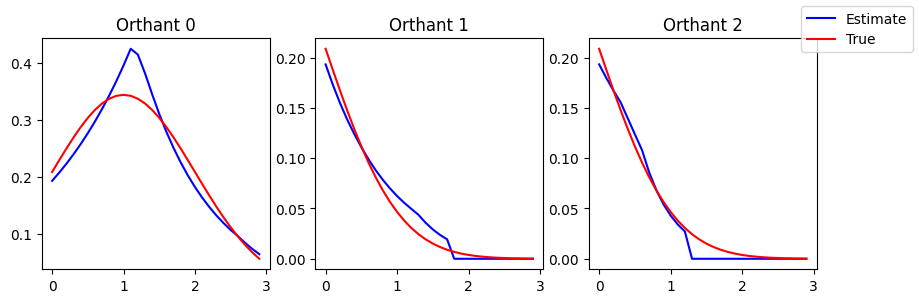

In [6]:
# plot of estimated density and true density
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,3,0.1)
axes[0].plot(xx, np.vectorize(lcmle.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(lcmle.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red")
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(lcmle.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].set_title("Orthant 2")
fig.legend()

## Kernel density estimator
To compare the result, we also compute the kernel density estimator from the same sample.

In [7]:
kde = lcd.kernel_density_estimate_1dim(x, ort, 3)

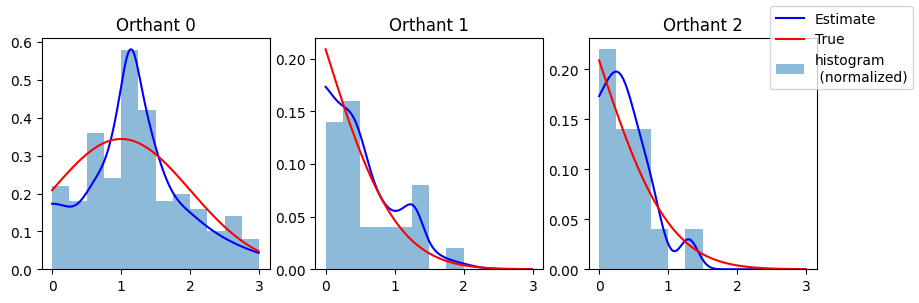

In [8]:
# plot of kernel density estimate and true_density
# Kernel density estimator
bin_edges = [k for k in np.arange(0,3.1,1/4)]
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,3,0.01)
axes[0].plot(xx, np.vectorize(kde.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].hist(x[ort==0], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==0])) ] , alpha=0.5)
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(kde.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red")
axes[1].hist(x[ort==1], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==1])) ] , alpha=0.5)
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(kde.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].hist(x[ort==2], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==2])) ] , alpha=0.5, label="histogram\n (normalized)")
axes[2].set_title("Orthant 2")
fig.legend()

## Computation of Integrated Squared Error (ISE)

In [9]:
# calculation of integrted squared error
lcmle_ise, lcmle_err = lcd.ise_1dim(true_density, lcmle, epsabs = 1e-5)
kde_ise, kde_err = lcd.ise_1dim(true_density, kde, epsabs = 1e-5)

In [10]:
lcmle_ise, kde_ise

(0.0033420610292167804, 0.024940447816269546)